In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_data=pd.read_csv(r'D:\課程\大四下\資料科學應用\project2\train.csv')
test_data=pd.read_csv(r'D:\課程\大四下\資料科學應用\project2\test.csv')
train_data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21.0,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,NaN,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21.0,-11.0,NaN,NW,6.71,0,0
3,2010,1,1,3,NaN,-21.0,NaN,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20.0,NaN,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2013,12,31,19,22.0,NaN,7.0,1013.0,NW,114.87,0,0
35060,2013,12,31,20,18.0,-21.0,7.0,1014.0,NW,119.79,0,0
35061,2013,12,31,21,23.0,-21.0,7.0,1014.0,NW,125.60,0,0
35062,2013,12,31,22,20.0,-21.0,NaN,1014.0,NW,130.52,0,0


In [67]:
test_data

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2014,1,1,0,-20.0,7.0,1014.0,NW,143.48,0,0
1,2014,1,1,1,-20.0,7.0,1013.0,NW,147.50,0,0
2,2014,1,1,2,-20.0,6.0,1013.0,NW,151.52,0,0
3,2014,1,1,3,-20.0,6.0,1013.0,NW,153.31,0,0
4,2014,1,1,4,-18.0,3.0,1012.0,cv,0.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,2014,12,31,19,NaN,-2.0,1034.0,NW,231.97,0,0
8756,2014,12,31,20,-22.0,-3.0,1034.0,NW,237.78,0,0
8757,2014,12,31,21,-22.0,NaN,NaN,NW,242.70,0,0
8758,2014,12,31,22,NaN,-4.0,1034.0,NW,246.72,0,0


In [75]:
#每年的最後一筆
train_data.query(' month==12 and day==31 and hour==23 ')

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
8759,2010,12,31,23,22.0,-21.0,NaN,1033.0,NW,565.49,0,0
17519,2011,12,31,23,283.0,-12.0,NaN,1030.0,cv,0.89,0,0
26303,2012,12,31,23,39.0,-10.0,NaN,1018.0,NW,1.79,0,0
35063,2013,12,31,23,23.0,-20.0,7.0,NaN,NW,137.67,0,0


In [79]:
data_2010=train_data.iloc[0:8760,:]
data_2011=train_data.iloc[8760:17519,:]
data_2012=train_data.iloc[17519:26303,:]
data_2013=train_data.iloc[26303:35063,:]

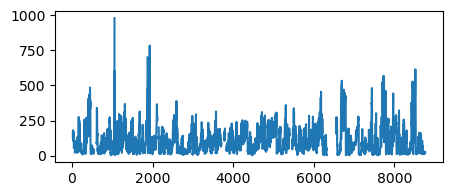

In [80]:
plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
plt.plot(data_2010['pm2.5'])
plt.show()

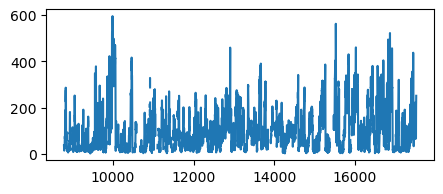

In [81]:
plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
plt.plot(data_2011['pm2.5'])
plt.show()

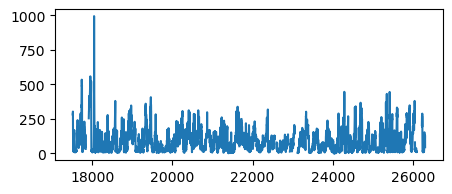

In [82]:
plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
plt.plot(data_2012['pm2.5'])
plt.show()

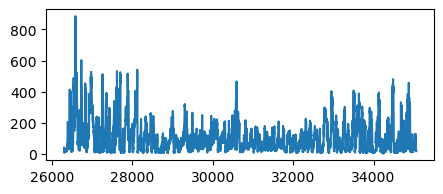

In [83]:
plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
plt.plot(data_2013['pm2.5'])
plt.show()

In [31]:
col_names=(test_data).columns
print(train_data.isnull().sum())  

year         0
month        0
day          0
hour         0
pm2.5     1968
DEWP      5259
TEMP     10519
PRES     14025
cbwd         0
Iws          0
Is           0
Ir           0
dtype: int64


In [32]:
print(test_data.isnull().sum())  

year        0
month       0
day         0
hour        0
DEWP      876
TEMP     1752
PRES      876
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm2.5   33096 non-null  float64
 5   DEWP    29805 non-null  float64
 6   TEMP    24545 non-null  float64
 7   PRES    21039 non-null  float64
 8   cbwd    35064 non-null  object 
 9   Iws     35064 non-null  float64
 10  Is      35064 non-null  int64  
 11  Ir      35064 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.2+ MB


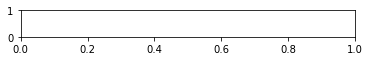

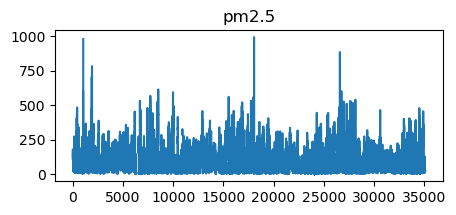

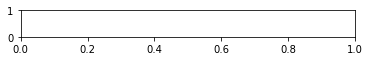

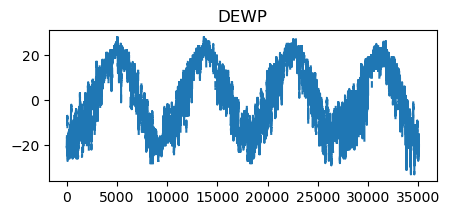

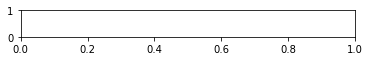

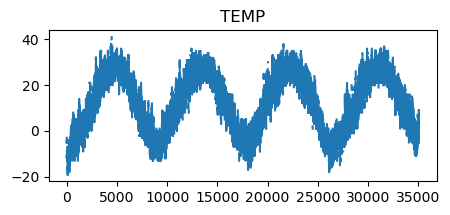

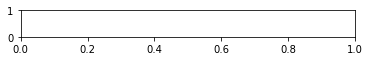

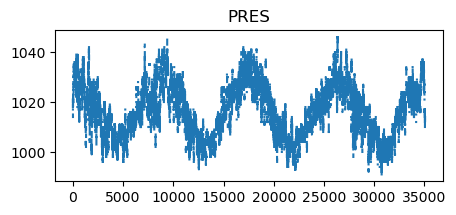

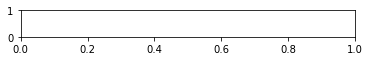

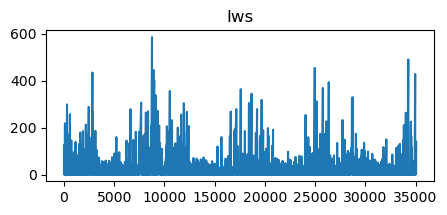

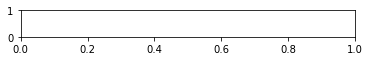

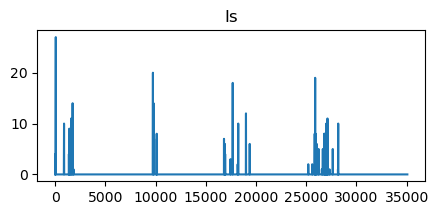

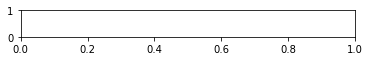

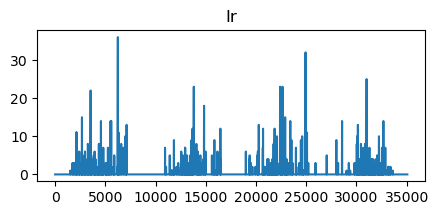

In [34]:
import matplotlib.pyplot as plt
features=['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']
for i in range(len(features)):
    plt.subplot(len(features), 1,i+1 )
    plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
    plt.plot(train_data[features[i]])
    plt.title(features[i])
    plt.show()

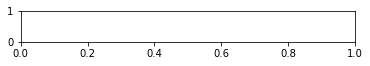

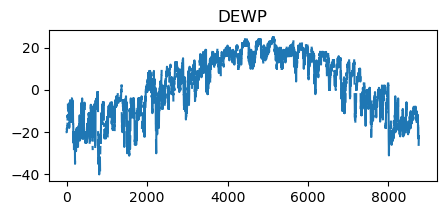

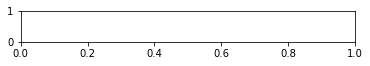

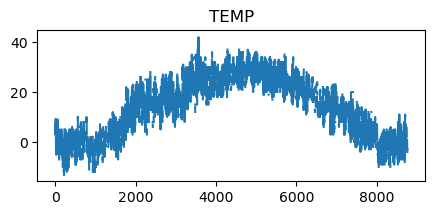

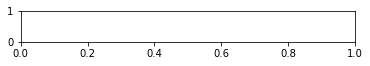

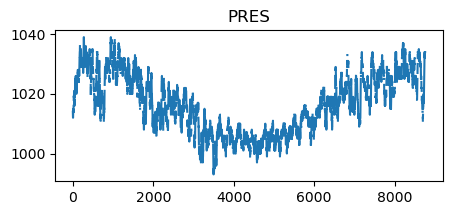

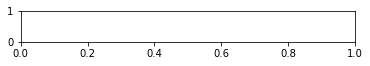

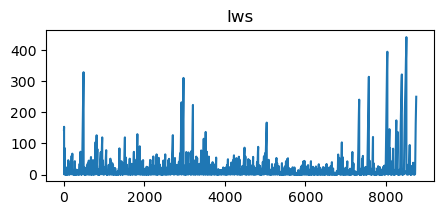

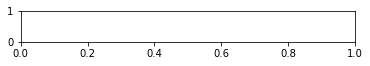

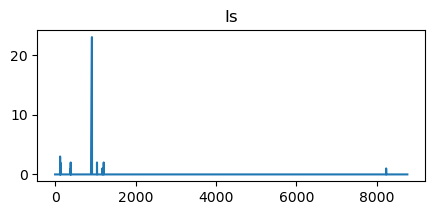

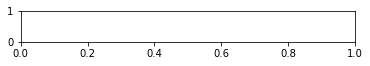

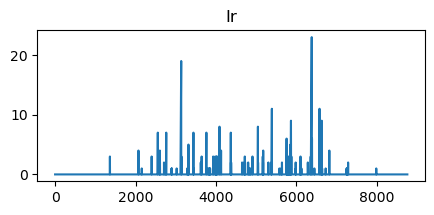

In [35]:
features=['DEWP','TEMP','PRES','Iws','Is','Ir']
for i in range(len(features)):
    plt.subplot(len(features), 1,i+1 )
    plt.figure(figsize=(5,2),dpi=100,linewidth = .1)
    plt.plot(test_data[features[i]])
    plt.title(features[i])
    plt.show()

In [36]:
train_data=train_data[['pm2.5','month','DEWP','TEMP','PRES','Iws','Is','Ir']]
train_y=train_data['pm2.5']
train_x=train_data.drop('pm2.5',1)

In [37]:
test_data=test_data[['month','DEWP','TEMP','PRES','Iws','Is','Ir']]

In [38]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [45]:
imp.fit(train_x)
train_x = imp.transform(train_x)
train_x=pd.DataFrame(train_x)
train_x

,0,1,2,3,4,5,6
0,1.0,-21.000000,-11.000000,1021.000000,1.79,0.0,0.0
1,1.0,1.787385,-12.000000,1020.000000,4.92,0.0,0.0
2,1.0,-21.000000,-11.000000,1016.261665,6.71,0.0,0.0
3,1.0,-21.000000,12.198778,1019.000000,9.84,0.0,0.0
4,1.0,-20.000000,12.198778,1018.000000,12.97,0.0,0.0
...,...,...,...,...,...,...,...
35059,12.0,1.787385,7.000000,1013.000000,114.87,0.0,0.0
35060,12.0,-21.000000,7.000000,1014.000000,119.79,0.0,0.0
35061,12.0,-21.000000,7.000000,1014.000000,125.60,0.0,0.0
35062,12.0,-21.000000,12.198778,1014.000000,130.52,0.0,0.0


In [46]:
test_x = imp.transform(test_data)
test_x=pd.DataFrame(test_x)
test_x

,0,1,2,3,4,5,6
0,1.0,-20.000000,7.000000,1014.000000,143.48,0.0,0.0
1,1.0,-20.000000,7.000000,1013.000000,147.50,0.0,0.0
2,1.0,-20.000000,6.000000,1013.000000,151.52,0.0,0.0
3,1.0,-20.000000,6.000000,1013.000000,153.31,0.0,0.0
4,1.0,-18.000000,3.000000,1012.000000,0.89,0.0,0.0
...,...,...,...,...,...,...,...
8755,12.0,1.787385,-2.000000,1034.000000,231.97,0.0,0.0
8756,12.0,-22.000000,-3.000000,1034.000000,237.78,0.0,0.0
8757,12.0,-22.000000,12.198778,1016.261665,242.70,0.0,0.0
8758,12.0,1.787385,-4.000000,1034.000000,246.72,0.0,0.0


In [47]:
train_y = train_y.fillna(np.mean(train_y))
#train__y=pd.DataFrame(train_y)
train_y

0        98.843153
1        98.843153
2        98.843153
3        98.843153
4        98.843153
           ...    
35059    22.000000
35060    18.000000
35061    23.000000
35062    20.000000
35063    23.000000
Name: pm2.5, Length: 35064, dtype: float64

In [56]:
import xgboost
XGB = xgboost.XGBRegressor()
XGB.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
prediction=XGB.predict(test_x)

In [62]:
len(prediction)

8760

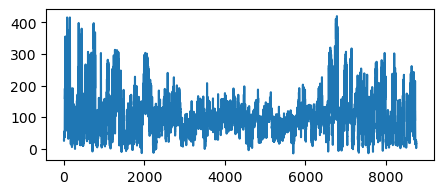

In [84]:
plt.figure(figsize=(5,2),dpi=100,linewidth = .2)
plt.plot(prediction)
plt.show()

In [63]:
ID=range(1,8761)
ans=pd.DataFrame({'ID':ID,'Predicted':prediction})

In [64]:
ans.to_csv('project2_XGB.csv',index=False)